In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [3]:
# Download necessary datasets from NLTK
nltk.download(['punkt', 'stopwords', 'gutenberg', 'averaged_perceptron_tagger', 'maxent_ne_chunker', 'words', 'vader_lexicon'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Loading "Persuasion" text
pride_prejudice_text = gutenberg.raw('austen-persuasion.txt')
print(pride_prejudice_text[:500])  # Display first 500 characters

[Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage;
there he found occupation for an idle hour, and consolation in a
distressed one; there his faculties were roused into admiration and
respect, by contemplating the limited remnant of the earliest patents;
there any unwelcome sensations, arising from domestic affairs
changed naturally into pity and contempt as he turn


In [5]:
# Tokenization
sentences = sent_tokenize(pride_prejudice_text)
words = word_tokenize(pride_prejudice_text)

In [6]:
# Stopwords removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

In [7]:
# Stemming
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]

In [8]:
# Frequency Distribution
word_freq = FreqDist(stemmed_words)

In [9]:
# Part-of-Speech Tagging
tagged_words = pos_tag(words)

In [10]:
# Named Entity Recognition
named_ent = ne_chunk(tagged_words, binary=True)

In [12]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(sent) for sent in sentences]

# Example: Printing sentiment scores for the first 5 sentences
for i, sent in enumerate(sentences[:5]):
    print(f"Sentence {i+1}: {sent}")
    print(f"Sentiment Scores: {sentiments[i]}")
    print()


Sentence 1: [Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage;
there he found occupation for an idle hour, and consolation in a
distressed one; there his faculties were roused into admiration and
respect, by contemplating the limited remnant of the earliest patents;
there any unwelcome sensations, arising from domestic affairs
changed naturally into pity and contempt as he turned over
the almost endless creations of the last century; and there,
if every other leaf were powerless, he could read his own history
with an interest which never failed.
Sentiment Scores: {'neg': 0.16, 'neu': 0.686, 'pos': 0.155, 'compound': -0.1814}

Sentence 2: This was the page at which
the favourite volume always opened:

           "ELLIOT OF KELLYNCH HALL.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence 3: "Walter Elliot, born March 1, 1760, 

In [13]:
# Data Exploration
unique_words = set(filtered_words)
longest_sentence = max(sentences, key=len)
shortest_sentence = min(sentences, key=len)
bigrams = list(ngrams(filtered_words, 2))
bigram_freq = FreqDist(bigrams)


In [14]:
# Displaying results
print(f"Total Sentences: {len(sentences)}")
print(f"Total Words (after cleaning): {len(filtered_words)}")
print(f"Most Common Words: {word_freq.most_common(10)}")
print(f"Number of Unique Words: {len(unique_words)}")
print(f"Longest Sentence: {longest_sentence}")
print(f"Shortest Sentence: {shortest_sentence}")
print(f"Most Common Bigrams: {bigram_freq.most_common(5)}")


Total Sentences: 3654
Total Words (after cleaning): 37747
Most Common Words: [('mr', 547), ('ann', 496), ('could', 451), ('would', 355), ('captain', 305), ('elliot', 293), ('ladi', 242), ('one', 239), ('must', 228), ('wentworth', 217)]
Number of Unique Words: 5732
Longest Sentence: For, though shy, he did not seem reserved;
it had rather the appearance of feelings glad to burst their
usual restraints; and having talked of poetry, the richness of
the present age, and gone through a brief comparison of opinion
as to the first-rate poets, trying to ascertain whether Marmion
or The Lady of the Lake were to be preferred, and how ranked the Giaour
and The Bride of Abydos; and moreover, how the Giaour was to be pronounced,
he showed himself so intimately acquainted with all the tenderest songs
of the one poet, and all the impassioned descriptions of hopeless agony
of the other; he repeated, with such tremulous feeling, the various lines
which imaged a broken heart, or a mind destroyed by wret

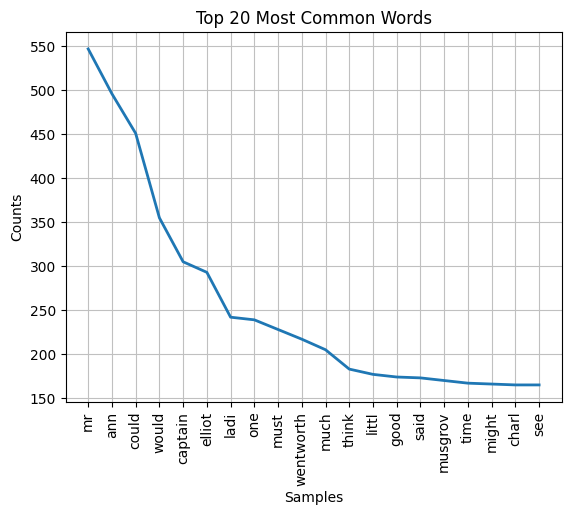

<Axes: title={'center': 'Top 20 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [15]:
# Visualization - Word Frequency Distribution
word_freq.plot(20, title="Top 20 Most Common Words")

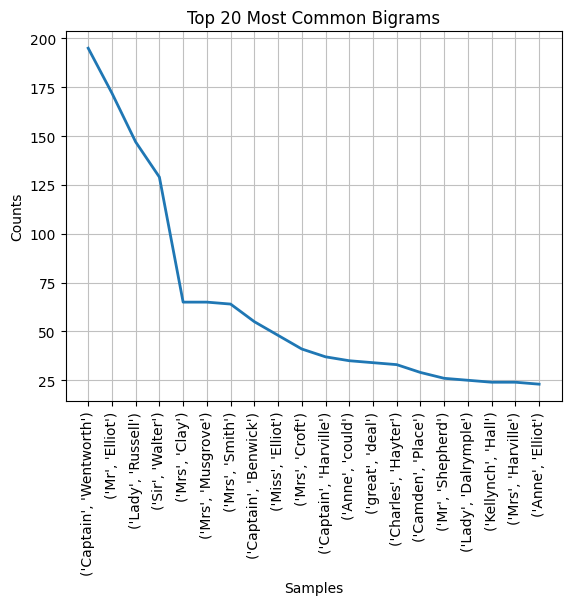

<Axes: title={'center': 'Top 20 Most Common Bigrams'}, xlabel='Samples', ylabel='Counts'>

In [16]:
# Visualization - Bigram Frequency Distribution
FreqDist(bigram_freq).plot(20, title="Top 20 Most Common Bigrams")